# Loading DATA

In [2]:
import numpy as np 
import pandas as pd 
import random 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
                              "Dynamic\nPromo ID","Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]


## Converting object columns to numerical
def convert_to_float(x):
  if x=="" or x in numerical_convertible_columns:
    return 0
  return float(x.replace(',',''))

##Removing % sign from Gross Margin Column Data
def p2f(x):
  if x=='' or x == "Gross Margin " or x == "Gross Margin %":
    return 0
  temp = x.strip('%') if x[-1] == "%" else x
  return float(temp.replace(',',''))

##Removing $ or () sign from Actual-Retail Column Data
def dollar_to_float(x):
  if x=="" or x == "Actual-Retail" or x == "Dynamic\nPromo ID" or x == "Dynamic Promo ID":
    return 0
  temp = x.strip(')') if x[-1] == ")" else x
  temp = temp[1:]  if temp[0] == '(' else temp
  temp = temp[1:]  if temp[0] == '$' else temp
  if x[0] == "-":
    return -1* dollar_to_float(temp[1:])
  else:
    return float(temp.replace(',',''))

In [4]:
data1718 = pd.read_csv("costello_ace_2017-2018.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data1718.shape

(17328044, 39)

In [6]:
data1718.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
17328039,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901105411,10541,"PALMYRA PUSHBROOM 18""",1.0,...,7.29,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,2.0,Sale,Category Price Plan,NaN
17328040,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901121725,12172,WIRE BRUSH MINI SS 3PK,1.0,...,3.78,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,3.0,Sale,Category Price Plan,NaN
17328041,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,41785997888,1455567,BRUSH SCRUB HANG-UP,1.0,...,1.56,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,4.0,Sale,Category Price Plan,NaN
17328042,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,8.2091E+11,2301166,CM SLIDE LOCK KNIFE,1.0,...,4.82,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,5.0,Sale,Category Price Plan,NaN
17328043,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [7]:
data1516 = pd.read_csv("costello_ace_2015-2016.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

In [8]:
data1516.shape

(15627499, 39)

In [9]:
pd.set_option('display.max_columns',
              500)

data1516.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
15627494,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,51643061880,8009730,"CORD STRETCH 48"" HVY DTY",1.0,2.10,1.68,0.42,20.00,80,SPORTING GOODS,856,STRETCH CORDS/TARP STRAPS,85601,STRETCH CORDS/HOOKS,1.0,NaN,NaN,0.0,2.10,5.99,3.89,Y,Alternate Tender,3.89,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,1.0,Sale,Category Price Plan,NaN
15627495,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,82901731900,73190,TARP POLY BLUE/BRN 6X8,1.0,3.06,2.45,0.61,19.93,70,"LAWN, GARDEN & FARM SUPPLIES",774,TARPS,77401,POLY TARPS,1.0,NaN,NaN,0.0,3.06,7.99,4.93,Y,Alternate Tender,4.93,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,2.0,Sale,Category Price Plan,NaN
15627496,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,42854024986,1365527,SPRAYER ORBITAL 24 OZ,1.0,2.00,1.60,0.40,20.00,10,CLEANING SUPPLIES,105,GLASS/PLASTIC CLEANERS,10505,SPRAYERS,1.0,NaN,NaN,0.0,2.00,3.99,1.99,Y,Alternate Tender,1.99,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,3.0,Sale,Category Price Plan,NaN
15627497,9/30/2016,21:29:00,507179,B84423,S,16147 CALDWELL,49000007640,CO5964,SPRITE 20OZ,1.0,1.19,0.95,0.24,20.17,9,SODA/ETC,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,1.19,1.99,0.80,Y,Alternate Tender,0.80,7063,NaN,1.9818e+09,GEORGE TAYLOR,Sale,1.0,Sale,Category Price Plan,NaN
15627498,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Cleaning Data

In [10]:
def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1516.index[data1516[column_name] == column_name].tolist()

rows_to_be_deleted_1 = [15627498]
for col in data1516.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_1)

print(len(np.unique(rows_to_be_deleted_1)))

def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1718.index[data1718[column_name] == column_name].tolist()

rows_to_be_deleted_2 = [17328043]
for col in data1718.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_2)

print(len(np.unique(rows_to_be_deleted_2)))

/usr/local/lib/python3.5/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


24
24


In [11]:
print(data1516.shape)
temp_df_1 = data1516.drop(rows_to_be_deleted_1)
print(temp_df_1.shape)

(15627499, 39)
(15627475, 39)


In [12]:
print(data1718.shape)
temp_df_2 = data1718.drop(rows_to_be_deleted_2)
print(temp_df_2.shape)

(17328044, 39)
(17328020, 39)


In [13]:
data1516 = temp_df_1
data1718 = temp_df_2

In [14]:
import gc
del temp_df_1, temp_df_2
gc.collect()

0

In [15]:
##Zip Code has 'NY'

# numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
#                               "Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]

# def RepresentsInt(s):
#   try: 
#     train_data[s].astype(str).str.replace(",","").astype(float) 
#     return True
#   except Exception as e:
#     print(s)
#     print(str(e))
#     return False
# num =[]  
# for v in numerical_convertible_columns:
#   if RepresentsInt(v):
#     num.append(v)
# num

## CLEANING 2015-16

In [16]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Grand Summaries' does not match format '%m/%d/%Y' (match)


In [17]:
data1516.loc[data1516['Date'] == 'Grand Summaries']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2198827,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5721680,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [18]:
# data1516.iloc[data1516['Date'] == 'Grand Summaries']
droplist = data1516.index[data1516['Date'] == 'Grand Summaries'].tolist()
print(droplist)

[2198827, 5721680]


In [19]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [20]:
droplist = data1516.index[data1516['Date'] == 'Count = 682060'].tolist()
print(droplist)

[2198828]


In [21]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [22]:
data1516.index[data1516['Date'] == 'Count = 682060'].tolist()

[]

In [23]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Count = 483724' does not match format '%m/%d/%Y' (match)


In [24]:
droplist = data1516.index[data1516['Date'] == 'Count = 483724'].tolist()
print(droplist)

[5721681]


In [25]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [26]:
data1516.index[data1516['Date'] == 'Count = 483724'].tolist()

[]

In [27]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [28]:
data1516.shape

(15627471, 39)

## CLEANING 2017-18

In [29]:
try:
    pd.to_datetime(data1718['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [30]:
data1718.shape

(17328020, 39)

## COMBINING DATAFRAMES 

In [31]:
frames = [data1516,data1718]
train_data = pd.concat(frames).reset_index(drop=True)

In [32]:
train_data.shape

(32955491, 39)

In [33]:
train_data.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN


In [34]:
train_data[train_data.index.duplicated()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [35]:
import gc
del data1516, data1718
gc.collect()

0

In [36]:
try:
  pd.to_datetime(train_data['Transaction Time'], format='%H:%M:%S', errors='raise')
except Exception as e:
  print(e)

In [37]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Customer Number         107
Scanned UPC          174798
Department Code          89
Class Code           429338
Class Name                3
Fineline Code       4126931
MIP Promo ID       27901181
Promo/Discount     25975311
Tender Type               1
Zip Code           10473835
Zip Plus-4         12815651
Loyalty ID         10324840
Clerk                   936
Pricing Source        50922
Return Code        31832090
dtype: int64

In [38]:
def find_cols():
  cat_columns = []
  num_columns = []
  for i in train_data.columns:
    if train_data[i].dtype=='object' :
      cat_columns.append(i)
    else:
      num_columns.append(i)
  print("-----------Numerical Columns------------")
  print(num_columns)
  print("----------Categorical Columns-----------")
  print(cat_columns)

find_cols()

-----------Numerical Columns------------
['Net Sales Units', 'Net Sales', 'Cost', 'Gross Margin', 'Gross Margin %', 'Item was Scanned', 'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail', '$ Off Retail', 'Line #']
----------Categorical Columns-----------
['Date', 'Transaction Time', 'Customer Number', 'Receipt Number', 'Store #', 'Store Name', 'Scanned UPC', 'Item Number', 'Item Description', 'Department Code', 'Department Name', 'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name', 'MIP Promo ID', 'Promo/Discount', 'Taxable', 'Tender Type', 'Zip Code', 'Zip Plus-4', 'Loyalty ID', 'Clerk', 'Item Type', 'Line Item Transaction Type', 'Pricing Source', 'Return Code']


# IMPUTING NANs

## Customer Number

In [39]:
train_data[train_data["Customer Number"]=="*5"]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN
5,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901720836,72083,GLOVE LTHR PALM LG,1.0,4.99,2.10,2.89,57.92,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,4.0,Sale,Retail,NaN
6,4/1/2015,7:31:55,*5,E89651,B,14252 ISLAND PARK,82901069294,1099332,SANDSPONG MED WEDG ACE,1.0,3.99,0.91,3.08,77.19,14,PAINT & PAINT SUPPLIES,150,HAND/POWER SANDING ABRASI,15003,HAND SANDING ACCESSORIES,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,GABRIELA PARATORE,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955463,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,3.0,2.67,1.07,1.60,59.93,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.89,0.00,0.89,Y,Alternate Tender,-0.89,NaN,NaN,NaN,SUSAN MAURICE,Sale,2.0,Sale,Manual Override,NaN
32955464,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,2.00,0.80,1.20,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,1.00,0.00,1.00,Y,Alternate Tender,-1.00,NaN,NaN,NaN,SUSAN MAURICE,Sale,3.0,Sale,Manual Override,NaN
32955465,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,0.98,0.39,0.59,60.20,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.49,0.00,0.49,Y,Alternate Tender,-0.49,NaN,NaN,NaN,SUSAN MAURICE,Sale,4.0,Sale,Manual Override,NaN
32955484,9/30/2018,18:21:20,*5,B02347,I,15110 GARDEN CITY PARK,76706844002,7104888,TRAP SPIDER & CRICKET PK,2.0,13.98,5.38,8.60,61.52,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,75004,INSECT BAITS/TRAPS,1.0,2082918,S,0.0,6.99,8.99,2.00,Y,Alternate Tender,2.00,NaN,NaN,NaN,MARK SMILOWITZ,Sale,1.0,Sale,Promotion,NaN


In [40]:
train_data["Customer Number"] = train_data["Customer Number"].fillna("*5")

In [41]:
train_data[train_data["Customer Number"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Store #

In [42]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [43]:
len(train_data["Store Name"].unique().tolist())

32

## Scanned UPC

In [44]:
train_data[train_data["Scanned UPC"].str.isalpha()==True]['Scanned UPC'].unique()

array(['OTHER', 'QF', 'LOGS', 'AUTO', 'ROUNDUP', 'GGARDEN', 'GGIFT',
       'RAZZLE', 'ISMERCH', 'GSNOW', 'HARDBOARD', 'STDPINE', 'GPAINT',
       'GOURDS', 'HAYBALE', 'FBWETMOP', 'JGSOIL', 'SPECIAL'], dtype=object)

In [45]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Scanned UPC"].isnull()].tolist())]["Item Number"].unique().tolist()
scan = train_data[train_data["Item Number"].isin(item_nums)]["Scanned UPC"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, scan))
temp = train_data[train_data["Scanned UPC"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
69,4/1/2015,7:58:56,88820,4298,P,15784 EI PAINT,NaN,12992,PAINTBRS CHIP 1.5WT BRSL,4.0,5.72,0.83,4.89,85.49,14,PAINT & PAINT SUPPLIES,131,PAINT BRUSHES,13106,SINGLE USE/TOSS-AWAY,1.0,NaN,Q,0.0,1.43,1.79,0.36,Y,Charge Tender,0.36,11730,NaN,1.98202e+09,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Category Price Plan,NaN
130,4/1/2015,8:05:32,10000,A35835,P,15784 EI PAINT,NaN,1081249,SHERLOCK EXT POLE 2-4',1.0,31.49,14.14,17.35,55.10,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17111,EXTENSION POLES,1.0,NaN,NaN,0.0,31.49,34.99,3.50,Y,Bankcard Tender,3.50,NaN,NaN,1.98149e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
369,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,73705834,.5 MIL 9X12 DROP 5PK,1.0,6.99,3.11,3.88,55.51,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,1.0,Sale,Retail,NaN
370,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,1395151,"DELUXE METAL TRAY 11""",1.0,5.99,2.19,3.80,63.44,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17110,TRAYS AND FRAMES,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Retail,NaN
820,4/1/2015,9:10:22,*5,F19982,E,14664 NORTH MASSAPEQUA,NaN,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,6.00,2.40,3.60,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,1.0,NaN,NaN,0.0,6.00,0.00,6.00,Y,Cash Tender,-6.00,NaN,NaN,NaN,MICHELLE LYNAM STRIBULA,Sale,1.0,Sale,Manual Override,NaN


In [46]:
train_data[train_data["Scanned UPC"].isnull()]["Scanned UPC"] = temp["Item Number"].map(mapping)
train_data.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(32955491, 39)

In [47]:
import gc
del temp
gc.collect()

0

## Item Number

In [48]:
train_data[train_data['Item Number']=="56"][['Item Number', 'Item Description', 'Scanned UPC']]

,Item Number,Item Description,Scanned UPC
54,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
55,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
56,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
90,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
91,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
...,...,...,...
32955461,56,FASTENERS,OTHER
32955462,56,FASTENERS,OTHER
32955463,56,FASTENERS,OTHER
32955464,56,FASTENERS,OTHER


## Department Code

In [49]:
dept_names = train_data[train_data.index.isin(train_data.index[train_data["Department Code"].isnull()].tolist())]["Department Name"].unique().tolist()
dept_code = train_data[train_data["Department Name"].isin(dept_names)]["Department Code"].tolist()
dept = train_data[train_data["Department Name"].isin(dept_names)]["Department Name"].tolist()
mapping = dict(zip(dept, dept_code))
temp = train_data[train_data["Department Code"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
3422832,12/2/2016,9:37:34,*A94K5,I45809,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,21037,1957,1.90118e+09,UNKNOWN CLERK KMCPOS,Sale,4.0,Sale,Promotion,NaN
3423209,12/2/2016,9:47:34,*AC9TK,I45817,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21144,1907,1.93344e+09,UNKNOWN CLERK KMCPOS,Sale,3.0,Sale,Promotion,NaN
3468908,12/3/2016,11:44:14,*AB3Z5,I46680,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21035,2230,1.9222e+09,UNKNOWN CLERK AAMPOS,Sale,3.0,Sale,Promotion,NaN
3474239,12/3/2016,12:31:18,*AC2YH,I46795,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,20711,9672,1.92857e+09,UNKNOWN CLERK RMLPOS,Sale,4.0,Sale,Promotion,NaN
3490432,12/3/2016,14:48:58,*A96T6,I47083,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,NaN,NaN,NaN,UNKNOWN CLERK AAMPOS,Sale,4.0,Sale,Promotion,NaN


In [50]:
mapping

{'BLANK': nan}

In [51]:
train_data["Department Code"] = train_data["Department Code"].fillna("NaN")

In [52]:
train_data[train_data["Department Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Name

In [53]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Class Name"].isnull()].tolist())]["Item Number"].unique().tolist()
class_names = train_data[train_data["Item Number"].isin(item_nums)]["Class Name"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, class_names))
temp = train_data[train_data["Class Name"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
21062605,2/2/2018,14:38:03,4250,18101,G,14874 WEST BABYLON,OTHER,1802628D,CARPET DRYER FAN 4.8A,1.0,251.99,163.20,88.79,35.24,10,CLEANING SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,251.99,279.99,28.0,Y,Charge Tender,28.0,11704,NaN,1.98173e+09,DOROTHY MARANO,Sale,1.0,Sale,Category Price Plan,NaN
24181335,7/30/2018,9:10:15,2045,I36840,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,30.59,15.25,15.34,50.15,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,30.59,33.99,3.4,N,Bankcard Tender,3.4,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,7.0,Sale,Category Price Plan,NaN
31472263,10/24/2018,11:10:39,2045,I43307,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,31.49,15.25,16.24,51.57,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,31.49,34.99,3.5,N,Bankcard Tender,3.5,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,22.0,Sale,Category Price Plan,NaN


In [54]:
mapping

{'1802628D': nan, '1839141D': nan}

In [55]:
train_data["Class Name"] = train_data["Class Name"].fillna("NaN")

In [56]:
train_data[train_data["Class Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Code 

In [57]:
item_nums = train_data[train_data["Class Code"].isnull()]['Class Name'].unique().tolist()
item_nums

['BLANK']

In [58]:
train_data[train_data['Class Name']=='BLANK'].shape

(429338, 39)

In [59]:
train_data["Class Code"] = train_data["Class Code"].fillna("NaN")

In [60]:
train_data[train_data["Class Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Fineline Name

In [61]:
train_data[train_data["Fineline Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [62]:
train_data[train_data["Fineline Code"].isnull()].shape

(4126931, 39)

In [63]:
item_nums = train_data[train_data["Fineline Code"].isnull()]['Fineline Name'].unique().tolist()
item_nums

['BLANK']

In [64]:
train_data["Fineline Code"] = train_data["Fineline Code"].fillna("NaN")

In [65]:
train_data[train_data["Fineline Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Customer Number

In [66]:
len(train_data[train_data['Customer Number'].str.startswith('*')][train_data['Zip Code'].isnull()])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10300357

In [67]:
train_data[train_data['Customer Number']=='*5'][~train_data['Zip Code'].isnull()]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
190323,4/11/2015,11:34:42,*5,H78772,F,14822 NORTHPORT,7.2865E+11,4567756,"STEEL FIREPIT 26""",1.0,29.99,27.29,2.70,9.00,46,HEATING & COOLING SUPPLIES,456,PATIO HEATERS & FIREPITS,45602,OUTDOOR GAS FIREPITS,1.0,1150409,S,0.0,29.99,44.99,15.0,Y,Cash Tender,15.0,11729,4402,1.90591e+09,KATHLEEN GORNEY,Sale,1.0,Sale,Promotion,NaN
281154,4/14/2015,14:38:13,*5,F02120,B,14252 ISLAND PARK,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,0.10,0.04,0.06,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.10,0.00,0.1,Y,Cash Tender,-0.1,11729,4402,1.90591e+09,GABRIELA PARATORE,Sale,1.0,Sale,Manual Override,NaN
1891047,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,073187670120,8036592,HTH SUPER CLARIFIER QT,1.0,14.99,6.89,8.10,54.04,80,SPORTING GOODS,855,POOL CHEMICALS & MAINTENA,085501,POOL CHEMICALS,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,1.0,Sale,Retail,NaN
1891048,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,855989006242,EA1173,MICRO NYLON WIRE 3'-ASST,1.0,4.99,2.00,2.99,59.92,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",369,PHONE ACCESSORIES,036904,PHONE ACCESSORIES,1.0,NaN,NaN,0.0,4.99,4.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,2.0,Sale,Retail,NaN
2241706,8/2/2015,17:14:11,*5,G32659,B,14252 ISLAND PARK,77924074158,8212698,"QCC1 HOSE & REGULATOR21""",1.0,34.99,13.68,21.31,60.90,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86906,GAS GRILL PARTS,1.0,NaN,NaN,0.0,34.99,34.99,0.0,Y,Bankcard Tender,0.0,11729,4402,1.90591e+09,AMANDA COMPETIELLO,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27360731,5/13/2017,16:15:50,*5,158827,Y,16663 EDGEWATER,OTHER,56,FASTENERS,1.0,0.00,0.00,0.00,0.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.00,0.00,0.0,Y,No Tender,0.0,11729,4402,1.90591e+09,LUKE ROLEN,Sale,1.0,Sale,Manual Override,NaN
28489593,5/21/2018,10:44:36,*5,J76940,W,16660 GLEN BURNIE,OTHER,700793,2CF RED COLORED MULCH,2.0,8.98,4.66,4.32,48.11,70,"LAWN, GARDEN & FARM SUPPLIES",746,BAG PRODUCTS,74610,DECO MULCH - LARGE BAG,5.0,NaN,NaN,0.0,4.49,4.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,CECILIA FINSTAD,Sale,1.0,Sale,Retail,NaN
28882584,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098439,2340495,"HAMMER BIT 1/8""X1-1/2""X3",1.0,8.49,4.12,4.37,51.47,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,1.0,Sale,Retail,NaN
28882586,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098514,2339968,"HAMMER BIT 5/16""X4""X6""",1.0,8.49,3.18,5.31,62.54,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,2.0,Sale,Retail,NaN


## Clerk

In [68]:
train_data[train_data['Clerk'].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
24235995,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,8.43518E+11,81960,BBQ TOOL SET 3PC SS/WOOD,1.0,9.41,7.84,1.57,16.68,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86901,BBQ TOOL SETS,1.0,NaN,NaN,0.0,9.41,17.99,8.58,Y,Bankcard Tender,8.58,11702,NaN,1.98149e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
24235996,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,7.83988E+11,8395568,PIGS ASS RUB SEASON6.5OZ,1.0,4.97,4.14,0.83,16.70,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86909,NO LONGER IN USE,1.0,NaN,NaN,0.0,4.97,7.99,3.02,N,Bankcard Tender,3.02,11702,NaN,1.98149e+09,NaN,Sale,2.0,Sale,Category Price Plan,NaN
24235997,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,32076894184,3013349,"STAPLE COAXL WH 1/4""CD50",1.0,1.69,1.41,0.28,16.57,34,ELECTRICAL SUPPLIES,316,STRAPS/STAPLES/CONNECTORS,31604,STAPLES,1.0,NaN,NaN,0.0,1.69,5.99,4.30,Y,Bankcard Tender,4.30,11702,NaN,1.98149e+09,NaN,Sale,3.0,Sale,Category Price Plan,NaN
24235998,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,82901001898,4008561,RING WAX EXTENDER KIT,1.0,4.63,3.85,0.78,16.85,40,PLUMBING SUPPLIES & FIXTURES,409,TOILET REPAIR,40901,WAX GASKET RINGS,1.0,NaN,NaN,0.0,4.63,8.99,4.36,Y,Bankcard Tender,4.36,11702,NaN,1.98149e+09,NaN,Sale,4.0,Sale,Category Price Plan,NaN
24236070,6/1/2017,13:09:59,509135,I82269,G,14874 WEST BABYLON,6.1127E+11,9274655,RED BULL ENRGY DRNK 12OZ,1.0,2.59,2.16,0.43,16.60,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,2.59,4.19,1.60,Y,Cash Tender,1.60,11726,NaN,1.9818e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844143,5/30/2017,10:48:37,*5,I81641,G,14874 WEST BABYLON,OTHER,56,FASTENERS,1.0,0.30,0.12,0.18,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.30,0.00,0.30,Y,Cash Tender,-0.30,NaN,NaN,NaN,NaN,Sale,2.0,Sale,Manual Override,NaN
27844197,5/30/2017,10:50:28,202081,I81642,G,14874 WEST BABYLON,37155675746,4258141,CARTRIDGE MOEN PLSTC LL,-1.0,-19.99,-7.73,-12.26,61.33,40,PLUMBING SUPPLIES & FIXTURES,401,FAUCET PARTS,40101,STEMS,1.0,NaN,NaN,0.0,19.99,19.99,0.00,Y,Bankcard Tender,0.00,11704,7914,1.91582e+09,NaN,Return,1.0,Return,Return Validation,W
27844710,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-1.0,-2.99,-0.75,-2.24,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Defective,1.0,Defective,Return Validation,D
27844711,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-2.0,-5.98,-1.50,-4.48,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Return,3.0,Return,Return Validation,W


In [69]:
import gc
del temp
gc.collect()

11

# APRIORI

In [70]:
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import sys

In [71]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [72]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [73]:
non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

def set_order_store_df(name):
  orders = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
  print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
  return orders

def set_order_dyn_promo_store_df(name):
  orders = train_data[~train_data['Department Name'].isin(non_items_dept)][~train_data["Dynamic Promo ID"].isnull()]\
  [train_data['Dynamic Promo ID']>0][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
  print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
  return orders

In [74]:
# temp = train_data.groupby(['Item Number','Item Description']).size().reset_index().rename(columns={0:'count'})
# temp = temp[['Item Number','Item Description']]
# temp = temp.rename(columns={'Item Number':'item_id', 'Item Description':'item_name'})

In [75]:
# temp.head()

In [76]:
# orders = set_order_store_df("1")

In [77]:
# orders

In [78]:
# %%time
# rules = association_rules(orders, 0.03)

In [79]:
# rules_final = merge_item_name(rules, temp).sort_values('lift', ascending=False)
# display(rules_final[rules_final['itemA']!=rules_final['itemB']].head(10))

# APRIORI and FP ALGO 

## STORE # 1

In [85]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [82]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

    
no_of_items = len(train_data[~train_data['Department Name'].isin(non_items_dept)]\
                  [train_data['Store #']=='1']["Item Description"].unique().tolist())

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014862,0.018266,0.002579,0.173520,9.499407,0.002307,1.187849
0,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018266,0.014862,0.002579,0.141184,9.499407,0.002307,1.147088
3,(CMN Donations),(FASTENERS),0.028148,0.049568,0.001674,0.059488,1.200123,0.000279,1.010547
2,(FASTENERS),(CMN Donations),0.049568,0.028148,0.001674,0.033781,1.200123,0.000279,1.005830


In [94]:
import gc
del test, df, rules
gc.collect()

NameError: name 'test' is not defined

In [84]:
# no_of_items = len(train_data[~train_data['Department Name'].isin(non_items_dept)]\
#                   [train_data['Store #']=='1']["Item Description"].unique().tolist())

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='P']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,(PAIL PAINT HANDY),(HANDY PAINT PAIL LINERS),0.001418,0.005220,0.001142,0.805310,154.265210,0.001135,5.109550
52,(GLASSSCRAPER GS50 ALLWAY),(STRT EDGE RAZOR BLADE .009 5 PK),0.002372,0.003639,0.001631,0.687831,189.008758,0.001623,3.191732
73,(SUPERHIDE LATEX SGBONE WHITE G),(SUPERHIDE LAT FLAT BONE WHITE 5),0.002033,0.004631,0.001368,0.672840,145.305982,0.001358,3.042450
112,"(CEILING WB U-FLT WHT 5GL, PLASTIC DEEP WELL T...",(REG SEL INT MATTE BS1 5G),0.001518,0.005045,0.001004,0.661157,131.062045,0.000996,2.936332
111,"(REG SEL INT MATTE BS1 5G, PLASTIC DEEP WELL T...",(CEILING WB U-FLT WHT 5GL),0.001606,0.005848,0.001004,0.625000,106.879024,0.000995,2.651073
...,...,...,...,...,...,...,...,...,...
51,(COLOR SAMPLE BM BASE1 PT),"(COLOR SAMPLE BM BASE2 PT, COLOR SAMPLE BM BAS...",0.048852,0.002723,0.001016,0.020807,7.640807,0.000883,1.018468
104,(REG SEL INT EGGSHL B1 GL),"(ROLLER REFILL 9""X1/2""GLOSSDELPRO)",0.048878,0.005710,0.001004,0.020539,3.597241,0.000725,1.015140
19,(REG SEL INT MATTE BS1 GL),"(ROLLER COVER 9"" 3/8""NAP)",0.052768,0.008119,0.001042,0.019738,2.431119,0.000613,1.011853
33,(REG SEL INT MATTE BS1 GL),(SUPERHIDE LAT FLAT WHITE GAL),0.052768,0.015397,0.001042,0.019738,1.281935,0.000229,1.004428


In [92]:
import gc
del test, df, rules
gc.collect()

NameError: name 'test' is not defined

In [89]:
test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='B']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

MemoryError: Unable to allocate array with shape (27, 30764145) and data type object

In [93]:
len(train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='1']["Item Description"].unique().tolist())

MemoryError: Unable to allocate array with shape (27, 30764145) and data type object

In [ ]:
import gc
del test, df, rules
gc.collect()

## FP ALGO

In [87]:
from mlxtend.frequent_patterns import fpgrowth

frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
frq_items

,itemsets,support
0,(REG SEL INT S-G WHITE GL),0.001179
1,(TAPE ELECT3/4X60'VYL ACE),0.004400
2,(SCRAPR RAZOR5BLADES ACE),0.001100
3,(CEMENT PVC 4OZ),0.001717
4,(LIQUID ANT BAIT 6PK),0.001363
...,...,...
149,(BATTERY-LITHIUM 3V 2025),0.001723
150,(KEY ARROW AR1-ACE),0.002634
151,(BATTERY ALK AA 16WIDE),0.001344
152,"(KEY KWIKSET KW1-ACE250PK, KEY SCHLAGE SC1-ACE...",0.002579


In [88]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014862,0.018266,0.002579,0.173520,9.499407,0.002307,1.187849
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018266,0.014862,0.002579,0.141184,9.499407,0.002307,1.147088
1,(CMN Donations),(FASTENERS),0.028148,0.049568,0.001674,0.059488,1.200123,0.000279,1.010547
0,(FASTENERS),(CMN Donations),0.049568,0.028148,0.001674,0.033781,1.200123,0.000279,1.005830


## APRIORI

In [89]:
from mlxtend.frequent_patterns import apriori

frq_items = apriori(df, min_support=0.001, use_colnames=True)
frq_items

,support,itemsets
0,0.001424,(60PAR38/HAL/XEN/FL/2PK/120V)
1,0.001491,(65BR30 REFLECTOR 2/PK)
2,0.002652,(65BR40/FL/HAL 120V)
3,0.002108,(80PAR38/HAL/XEN/FL/2PK/120V)
4,0.001186,(ACE BAG 39GAL 26CT FLAP)
...,...,...
149,0.001216,(WHEELED GARBAGE CAN 35G)
150,0.001418,(WINDEX ORIGINAL 23OZ)
151,0.002163,(WINDSHIELD WASH ACE GAL)
152,0.001674,"(FASTENERS, CMN Donations)"


In [90]:
from mlxtend.frequent_patterns import association_rules 

rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.014862,0.018266,0.002579,0.173520,9.499407,0.002307,1.187849
2,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.018266,0.014862,0.002579,0.141184,9.499407,0.002307,1.147088
1,(CMN Donations),(FASTENERS),0.028148,0.049568,0.001674,0.059488,1.200123,0.000279,1.010547
0,(FASTENERS),(CMN Donations),0.049568,0.028148,0.001674,0.033781,1.200123,0.000279,1.005830


In [93]:
!sudo pip install efficient-apriori


In [96]:
!sudo pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp35-none-any.whl size=7812 sha256=187c5d06a00d266dd368d34cd25cece77eaa8fd5fc59c77f63276206b782a7e7
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [104]:
from apyori import apriori

association_rules = apriori(dataset, min_support=0.001, min_confidence=0.1, min_length=2)
association_results = list(association_rules)
association_results

<generator object apriori at 0x7f11a9ec2af0>

# SARIMA

In [82]:
train_data = train_data[~train_data['Department Name'].isin(non_items_dept)]

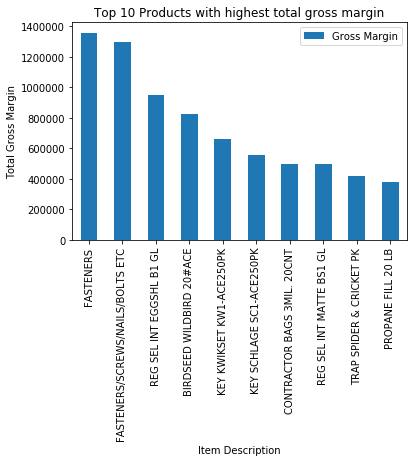

In [83]:
sum_df = train_data.groupby(['Item Description']).agg({'Gross Margin':'sum'})
sum_df = sum_df.sort_values('Gross Margin',ascending=False)
sum_df = sum_df[:10]
ax =plt.subplot()
sum_df.plot.bar(ax=ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Total Gross Margin')
ax.set_title('Top 10 Products with highest total gross margin')
plt.show()

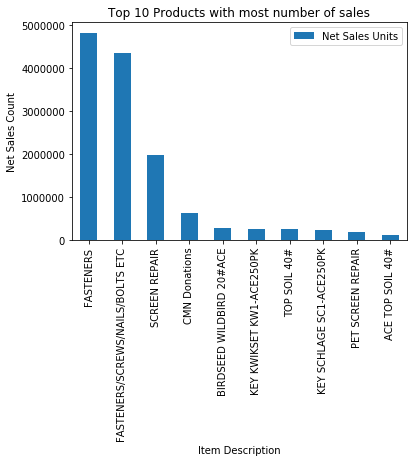

In [84]:
sales_count = train_data.groupby(['Item Description']).agg({'Net Sales Units':'sum'})
sales_count = sales_count.sort_values('Net Sales Units',ascending=False)
sales_count = sales_count[:10]
ax = plt.subplot()
sales_count[:10].plot.bar(ax = ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Net Sales Count')
ax.set_title('Top 10 Products with most number of sales')
plt.show()

In [85]:
train_data_9  = train_data[train_data['Store #'] == '9']
train_data_T  = train_data[train_data['Store #'] == 'T']

In [86]:
import datetime
datetime.date(2010, 6, 16).strftime("%V")

'24'

In [87]:
x = pd.DatetimeIndex(train_data_9['Date']).weekofyear

In [88]:
print(pd.unique(x))

[14 15 16 17 18 13 31 32 33 34 35 36 49 50 51 52 53 48  5  6  7  8  9  1
  2  3  4 27 28 29 30 26 23 24 25 22 10 11 12 19 20 21 44 45 46 47 40 41
 42 43 39 37 38]


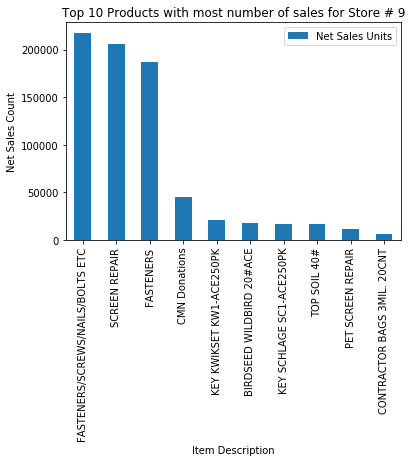

In [89]:
sales_count_9 = train_data_9.groupby(['Item Description']).agg({'Net Sales Units':'sum'})
sales_count_9 = sales_count_9.sort_values('Net Sales Units',ascending=False)
sales_count_9 = sales_count_9[:10]
ax = plt.subplot()
sales_count_9.plot.bar(ax = ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Net Sales Count')
ax.set_title('Top 10 Products with most number of sales for Store # 9')
plt.show()

In [99]:
train_data_9['Month'] = pd.DatetimeIndex(train_data_9['Date']).month
train_data_9['Year'] = pd.DatetimeIndex(train_data_9['Date']).year
train_data_9['Week'] = pd.DatetimeIndex(train_data_9['Date']).weekofyear
train_data_T['Month'] = pd.DatetimeIndex(train_data_T['Date']).month
train_data_T['Year'] = pd.DatetimeIndex(train_data_T['Date']).year

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [120]:
train_data_9_56  = train_data_9[train_data_9['Item Number'] == '56']
train_data_9_56_year = train_data_9_56.groupby('Year')
train_data_9_56_15 = train_data_9_56_year.get_group(2015)
train_data_9_56_16 = train_data_9_56_year.get_group(2016)
train_data_9_56_17 = train_data_9_56_year.get_group(2017)
# train_year_17_T['Item Number'].value_counts()
train_data_9_56_18 = train_data_9_56_year.get_group(2018)
# train_year_18_T['Item Number'].value_counts()


In [121]:
monthcount_15 = train_data_9_56_15.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_16['Month'] = train_data_9_56_16['Month'] + 12
monthcount_16 = train_data_9_56_16.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_17['Month'] = train_data_9_56_17['Month'] + 24
monthcount_17 = train_data_9_56_17.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_18['Month'] = train_data_9_56_18['Month'] + 36
monthcount_18 = train_data_9_56_18.groupby(['Month']).agg({'Net Sales Units':'sum'})


monthcount =monthcount_15.append(monthcount_16).append(monthcount_17).append(monthcount_18)
monthcount

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Net Sales Units
Month,
1,7225.00
2,5371.00
3,7685.79
4,10582.00
5,12645.50
6,10675.10
7,10260.20
8,10717.00
9,9563.00


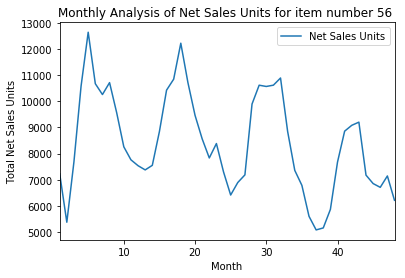

In [122]:
ax = plt.subplot()
monthcount.plot.line(ax =ax)
ax.set_title('Monthly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Month')
ax.set_ylabel('Total Net Sales Units')
plt.show()

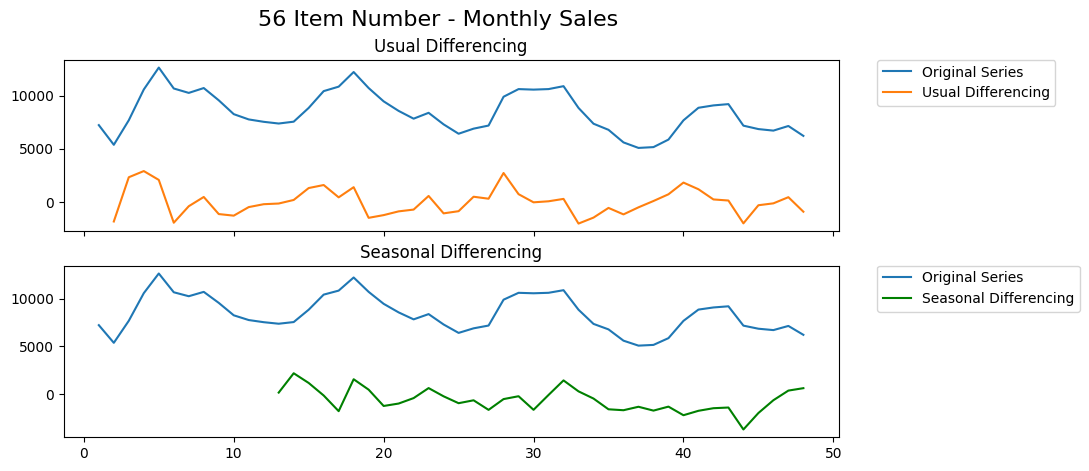

In [94]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(monthcount[:], label='Original Series')
axes[0].plot(monthcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(monthcount[:], label='Original Series')
axes[1].plot(monthcount[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Monthly Sales', fontsize=16)
plt.show()

In [7]:
!sudo pip3 install pyramid-arima

     |████████████████████████████████| 604kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 8.0MB 23.0MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 41.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 60.4MB/s eta 0:00:01


In [8]:
pip install pyramid-arima

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.5/dist-packages (1.17.4)
Note: you may need to restart the kernel to use updated packages.


In [95]:
from pyramid.arima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(monthcount[:42], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=510.646, BIC=513.448, Fit time=3.463 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=509.209, BIC=514.814, Fit time=0.113 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=507.001, BIC=511.204, Fit time=0.069 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=508.667, BIC=514.272, Fit time=0.117 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=509.817, BIC=515.422, Fit time=0.043 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=510.166, BIC=517.172, Fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -250.500
Date:                            Sat, 30 Nov 2019   AIC                            507.001
Time:                                    16:40:07   BIC                            511.204
Sample:                                         0   HQIC                           508.345
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -436.0728    239.462     -1.821      0.069    -905.410      33.264
ar.L1          0.3195      0.142      2.244      0.025       0.040       0.599
sigma2      9.988e+05   2.86e+05      3.494      0.000    4.38e+05    1.56e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.46
Prob(Q):                               nan   Prob(JB):                         0.07
Heteroskedasticity (H):               0.29   Skew:                             1.01
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

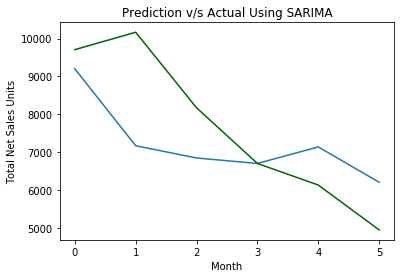

In [97]:
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(monthcount[42:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Month")
plt.ylabel("Total Net Sales Units")
plt.show()

In [123]:
weekcount_15 = train_data_9_56_15.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_16['Week'] = train_data_9_56_16['Week'] + 52
weekcount_16 = train_data_9_56_16.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_17['Week'] = train_data_9_56_17['Week'] + 104
weekcount_17 = train_data_9_56_17.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_18['Week'] = train_data_9_56_18['Week'] + 156
weekcount_18 = train_data_9_56_18.groupby(['Week']).agg({'Net Sales Units':'sum'})


weekcount =weekcount_15.append(weekcount_16).append(weekcount_17).append(weekcount_18)
weekcount

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Net Sales Units
Week,
1,1201.00
2,1765.00
3,1177.00
4,1721.00
5,1580.00
...,...
204,1333.00
205,1656.00
206,1391.99


In [124]:
weekcount.describe

<bound method NDFrame.describe of       Net Sales Units
Week                 
1             1201.00
2             1765.00
3             1177.00
4             1721.00
5             1580.00
...               ...
204           1333.00
205           1656.00
206           1391.99
207           1263.00
208           1366.00

[210 rows x 1 columns]>

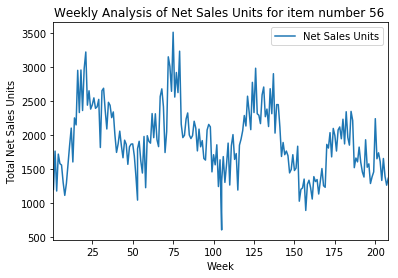

In [125]:
ax = plt.subplot()
weekcount.plot.line(ax =ax)
ax.set_title('Weekly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Week')
ax.set_ylabel('Total Net Sales Units')
plt.show()

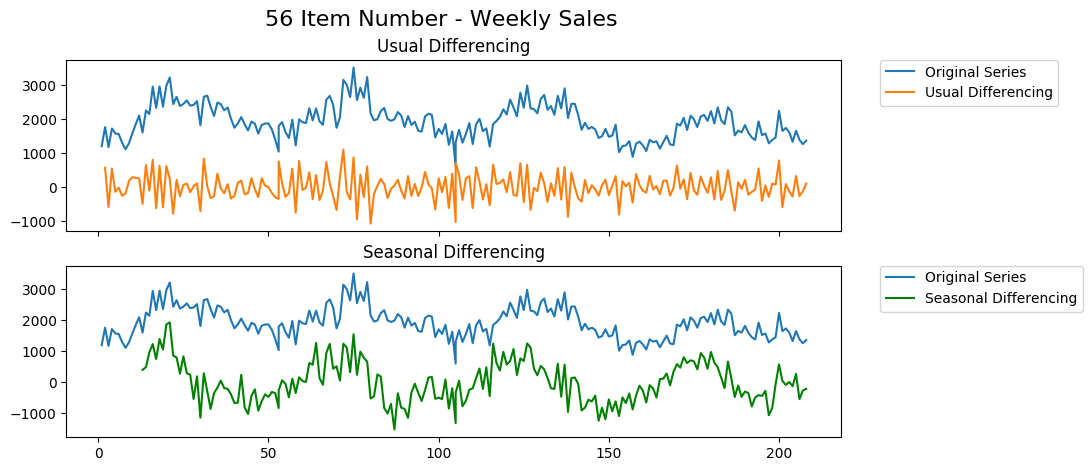

In [126]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(weekcount[:], label='Original Series')
axes[0].plot(weekcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(weekcount[:], label='Original Series')
axes[1].plot(weekcount[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Weekly Sales', fontsize=16)
plt.show()

In [156]:
from pyramid.arima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel_week = auto_arima(weekcount[:200], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=2, D=2, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_week.summary()

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 52); AIC=1696.583, BIC=1701.670, Fit time=1.640 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 52); AIC=1575.938, BIC=1586.111, Fit time=63.285 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 2, 0, 52); AIC=1636.008, BIC=1643.638, Fit time=3.364 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 2, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 2, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 2, 0, 52); AIC=1631.295, BIC=1638.925, Fit time=26.878 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(1, 2, 0, 52); AIC=1556.797, BIC=1569.513, F

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(0, 2, 2)x(1, 2, 0, 52)   Log Likelihood                -739.570
Date:                            Sat, 30 Nov 2019   AIC                           1489.139
Time:                                    18:52:04   BIC                           1501.856
Sample:                                         0   HQIC                          1494.276
                                            - 200                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8997      0.339     -2.655      0.008      -1.564      -0.236
ma.L1         -1.9976      0.166    -12.051      0.000      -2.322      -1.673
ma.L2          1.0000      0.167      6.002      0.000       0.673       1.327
ar.S.L52      -0.7934      0.064    -12.443      0.000      -0.918      -0.668
sigma2      2.883e+05   1.15e-06    2.5e+11      0.000    2.88e+05    2.88e+05
===================================================================================
Ljung-Box (Q):                       53.30   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.08   Prob(JB):                         1.00
Heteroskedasticity (H):               1.04   Skew:                             0.01
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.42e+26. Standard errors may be unstable.
"""

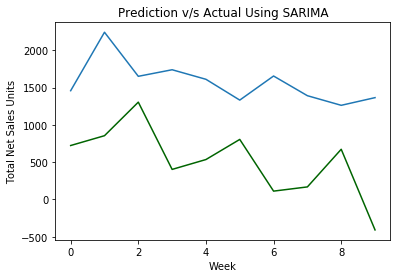

In [157]:
n_periods = 10
fitted, confint = smodel_week.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(weekcount[200:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

In [158]:
smodel_less_parameters = auto_arima(weekcount[:200],
                         test='adf', m=52, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_less_parameters.summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 52); AIC=2899.906, BIC=2926.293, Fit time=18.756 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=3060.831, BIC=3067.428, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=2934.518, BIC=2947.711, Fit time=5.002 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=2989.255, BIC=3002.448, Fit time=5.786 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 52); AIC=2897.937, BIC=2921.025, Fit time=8.716 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 52); AIC=2896.241, BIC=2916.031, Fit time=0.178 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 52); AIC=2893.868, BIC=2910.360, Fit time=0.268 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 52); AIC=2894.555, BIC=2907.748, Fit time=0.217 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 52); AIC=2893.405, BIC=2913.195, Fit time=0.356 seconds
Fit ARIMA: order=(0, 0, 2) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -1434.158
Date:                Sat, 30 Nov 2019   AIC                           2882.316
Time:                        18:53:56   BIC                           2905.404
Sample:                             0   HQIC                          2891.659
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    289.5255     96.072      3.014      0.003     101.228     477.823
ar.L1          0.8468      0.048     17.813      0.000       0.754       0.940
ma.L1         -0.6004      0.073     -8.236      0.000      -0.743      -0.458
ma.L2          0.1741      0.084      2.073      0.038       0.010       0.339
ma.L3          0.0734      0.079      0.929      0.353      -0.081       0.228
ma.L4          0.3196      0.070      4.547      0.000       0.182       0.457
sigma2      9.675e+04   1.03e+04      9.413      0.000    7.66e+04    1.17e+05
===================================================================================
Ljung-Box (Q):                       48.61   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.16   Prob(JB):                         0.59
Heteroskedasticity (H):               0.63   Skew:                             0.18
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
smodel_less_parameters

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 0, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 52), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

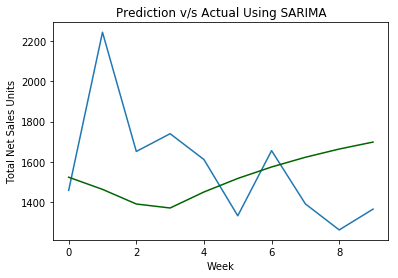

In [159]:
n_periods = 10
fitted, confint = smodel_less_parameters.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(weekcount[200:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

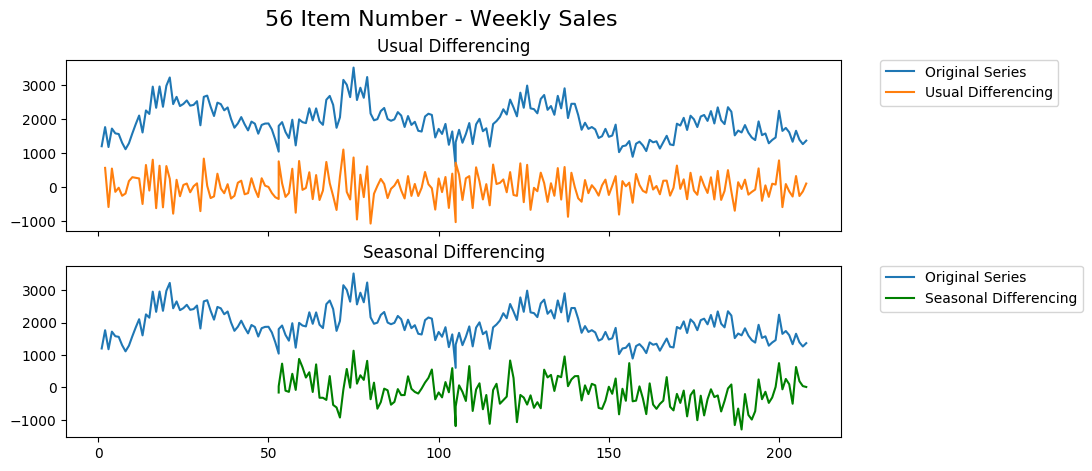

In [164]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(weekcount[:], label='Original Series')
axes[0].plot(weekcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(weekcount[:], label='Original Series')
axes[1].plot(weekcount[:].diff(52), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Weekly Sales', fontsize=16)
plt.show()

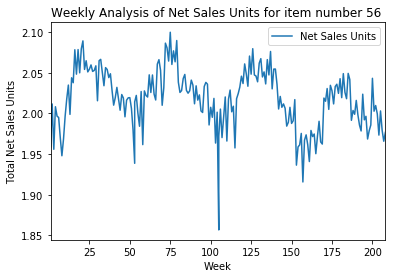

In [174]:
ax = plt.subplot()
np.log(np.log(weekcount)).plot.line(ax =ax)
ax.set_title('Weekly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Week')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [175]:
smodel_less_log = auto_arima(np.log(np.log(weekcount[:200])),
                         test='adf', m=52, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_less_log.summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 52); AIC=-894.703, BIC=-868.317, Fit time=32.211 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=-753.451, BIC=-746.854, Fit time=0.075 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=-573.896, BIC=-560.703, Fit time=17.859 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=-814.016, BIC=-800.823, Fit time=5.148 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 52); AIC=-898.214, BIC=-875.126, Fit time=20.272 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 52); AIC=-900.127, BIC=-880.337, Fit time=0.394 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 52); AIC=-902.328, BIC=-885.836, Fit time=0.427 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 52); AIC=-894.838, BIC=-881.645, Fit time=0.152 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 52); AIC=-899.406, BIC=-879.616, Fit time=0.331 seconds
Fit ARIMA: order=(0, 0, 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 456.164
Date:                Sat, 30 Nov 2019   AIC                           -902.328
Time:                        19:09:48   BIC                           -885.836
Sample:                             0   HQIC                          -895.654
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1496      0.079      1.885      0.059      -0.006       0.305
ar.L1          0.9257      0.039     23.471      0.000       0.848       1.003
ma.L1         -0.6485      0.089     -7.325      0.000      -0.822      -0.475
ma.L2          0.1151      0.068      1.696      0.090      -0.018       0.248
sigma2         0.0006   4.02e-05     15.307      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       70.18   Jarque-Bera (JB):               180.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -1.05
Prob(H) (two-sided):                  0.38   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

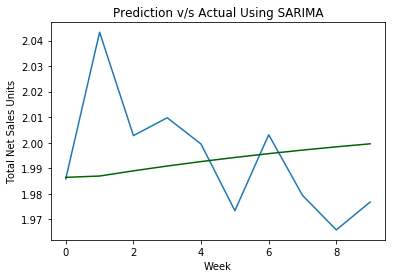

In [176]:
n_periods = 10
fitted, confint = smodel_less_log.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(np.log(np.log((weekcount[200:].values))))
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

# LSTM

In [145]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [137]:
dataset = weekcount #numpy.ndarray
# dataset = dataset.astype('float32')
# dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [138]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [139]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [140]:
X_train.shape

(137, 30)

In [141]:
Y_train.shape

(137,)

In [142]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [143]:
X_train.shape

(137, 1, 30)

In [146]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 137 samples, validate on 11 samples
Epoch 1/20
137/137 [==============================] - 2s 16ms/step - loss: 0.2625 - val_loss: 0.0889
Epoch 2/20
137/137 [==============================] - 0s 618us/step - loss: 0.1809 - val_loss: 0.0486
Epoch 3/20
137/137 [==============================] - 0s 157us/step - loss: 0.1147 - val_loss: 0.0217
Epoch 4/20
137/137 [==============================] - 0s 179us/step - loss: 0.0698 - val_loss: 0.0094
Epoch 5/20
137/137 [==============================] - 0s 174us/step - loss: 0.0444 - val_loss: 0.0095
Epoch 6/20
137/137 [==============================] - 0s 259us/step - loss: 0.0384 - val_loss: 0.0174
Epoch 7/20
137/137 [==============================] - 0s 243us/step - loss: 0.0428 - val_loss: 0.0268
Epoch 8/20
137/137 [==============================] - 0s 252us/step - loss: 0.0497 - val_loss: 0.0326
Epoch 9/20
137/137 [==============================] - 0s 5

In [147]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 395.4163214957801
Train Root Mean Squared Error: 496.54526344035656
Test Mean Absolute Error: 237.65374112215906
Test Root Mean Squared Error: 294.68660133100377


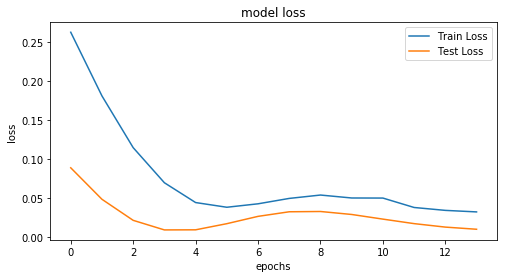

In [148]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [150]:
Y_test.shape

(1, 11)

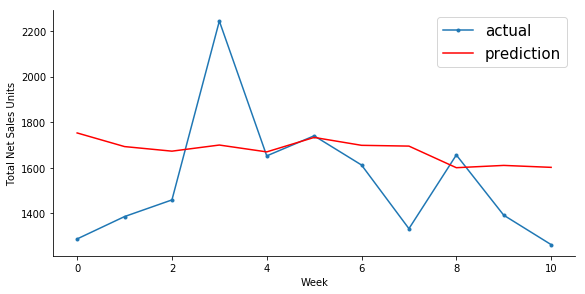

In [153]:
aa=[x for x in range(11)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:11], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:11], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Total Net Sales Units')
plt.xlabel('Week')
plt.legend(fontsize=15)
plt.show();

https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html
https://people.duke.edu/~rnau/411arim.htm